In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('CollegeRookieStatLog3.csv')
df.head()

,Unnamed: 0,Name,School,G,MP,FG,FGA,FG%,2P,2PA,...,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Pk,Tm,Year,Pos
0,0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,...,6.65,7.4,1.9,1.1,1.7,12.0,1,NJN,2000,PF
1,1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,...,5.84,3.6,0.4,0.8,1.0,4.9,2,VAN,2000,PF
2,2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,...,6.27,4.3,1.1,0.4,0.3,9.5,4,CHI,2000,PF
3,3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,...,7.07,4.0,1.7,0.6,0.2,11.9,5,ORL,2000,SF
4,4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,...,8.50,2.3,0.8,0.6,0.4,5.1,6,ATL,2000,SF


In [2]:
df = df.drop(['Unnamed: 0'], axis=1)

In [3]:
df = df.replace('C-', 'C')
positions = df.Pos.unique()
po_dict = dict(zip(positions, range(len(positions))))
df1 = df.replace({'Pos': po_dict})
teams = df.Tm.unique()
te_dict = dict(zip(teams, range(len(teams))))
df1 = df1.replace({'Tm': te_dict})
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Pk,Tm,Year,Pos
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,6.65,7.4,1.9,1.1,1.7,12.0,1,0,2000,0
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,5.84,3.6,0.4,0.8,1.0,4.9,2,1,2000,0
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,6.27,4.3,1.1,0.4,0.3,9.5,4,2,2000,0
3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,7.07,4.0,1.7,0.6,0.2,11.9,5,3,2000,1
4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,8.50,2.3,0.8,0.6,0.4,5.1,6,4,2000,1


In [4]:
df1['Fouls'] = df1['PF']
df1 = df1.drop(['PF'], axis=1)
dum1 = pd.get_dummies(df1['Pos'])
df1 = pd.concat([df1, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,NBAPTS,Pk,Tm,Year,Fouls,0,1,2,3,4
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,12.0,1,0,2000,2.0,1,0,0,0,0
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,4.9,2,1,2000,2.6,1,0,0,0,0
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,9.5,4,2,2000,1.9,1,0,0,0,0
3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,11.9,5,3,2000,1.9,0,1,0,0,0
4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,5.1,6,4,2000,2.0,0,1,0,0,0


In [5]:
schoolnames = df1.School.unique()
sc_dict = dict(zip(schoolnames, range(len(schoolnames))))
df1 = df1.replace({'School': sc_dict})
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,NBAPTS,Pk,Tm,Year,Fouls,0,1,2,3,4
0,Kenyon Martin,0,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,12.0,1,0,2000,2.0,1,0,0,0,0
1,Stromile Swift,1,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,4.9,2,1,2000,2.6,1,0,0,0,0
2,Marcus Fizer,2,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,9.5,4,2,2000,1.9,1,0,0,0,0
3,Mike Miller,3,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,11.9,5,3,2000,1.9,0,1,0,0,0
4,DerMarr Johnson,0,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,5.1,6,4,2000,2.0,0,1,0,0,0


In [6]:
df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,NBAPTS,Pk,Tm,Year,Fouls,0,1,2,3,4
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,...,12.0,1,0,2000,2.0,1,0,0,0,0
Stromile Swift,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,...,4.9,2,1,2000,2.6,1,0,0,0,0
Marcus Fizer,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,...,9.5,4,2,2000,1.9,1,0,0,0,0
Mike Miller,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,...,11.9,5,3,2000,1.9,0,1,0,0,0
DerMarr Johnson,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,...,5.1,6,4,2000,2.0,0,1,0,0,0


In [7]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,0,1,2,3,4,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,...,1,0,0,0,0,7.4,1.9,1.1,1.7,12.0
Stromile Swift,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,...,1,0,0,0,0,3.6,0.4,0.8,1.0,4.9
Marcus Fizer,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,...,1,0,0,0,0,4.3,1.1,0.4,0.3,9.5
Mike Miller,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,...,0,1,0,0,0,4.0,1.7,0.6,0.2,11.9
DerMarr Johnson,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,...,0,1,0,0,0,2.3,0.8,0.6,0.4,5.1


In [8]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['NBATRB','NBAAST','NBASTL','NBABLK']
for du in dum:
    cols.remove(du)

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#cols = df1.columns
sc2 = StandardScaler()
for col in cols:
    df1[[col]] = sc2.fit_transform(df1[[col]])
#df1['NBAPTS'] = sc2.fit_transform(df1['NBAPTS'])
sc3 = StandardScaler()
df1[['NBABLK']] = sc3.fit_transform(df1[['NBABLK']])
sc4 = StandardScaler()
df1[['NBASTL']] = sc4.fit_transform(df1[['NBASTL']])
sc5 = StandardScaler()
df1[['NBAAST']] = sc5.fit_transform(df1[['NBAAST']])
sc6 = StandardScaler()
df1[['NBATRB']] = sc6.fit_transform(df1[['NBATRB']])
df1.head()

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\si

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,0,1,2,3,4,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,0.791051,-1.083978,-0.264125,-0.893807,1.872415,0.530167,0.142342,1.356737,-1.341998,-1.384652,...,1.922575,-0.488141,-0.343753,-0.546974,-0.590708,2.633067,0.465495,1.554361,4.471507,1.548442
Stromile Swift,-0.974416,-0.458212,0.280571,-0.356166,1.418773,0.917320,0.528005,1.263167,-1.080245,-1.081223,...,1.922575,-0.488141,-0.343753,-0.546974,-0.590708,0.618591,-0.593309,0.788456,2.283816,-0.134317
Marcus Fizer,0.282811,0.901210,1.836844,1.400128,0.563833,2.465931,2.584872,0.121612,-1.080245,-1.081223,...,1.922575,-0.488141,-0.343753,-0.546974,-0.590708,0.989679,-0.099200,-0.232752,0.096124,0.955921
Mike Miller,-0.573174,-0.436634,-0.186311,-0.284481,0.075295,-0.321569,-0.586131,0.888887,0.228517,0.334776,...,-0.520136,2.048590,-0.343753,-0.546974,-0.590708,0.830641,0.324322,0.277852,-0.216403,1.524741
DerMarr Johnson,-1.455907,-0.264009,-0.264125,-0.284481,-0.011944,-0.708722,-1.014645,1.076027,0.752023,0.789919,...,-0.520136,2.048590,-0.343753,-0.546974,-0.590708,-0.070572,-0.310961,0.277852,0.408652,-0.086916


In [10]:
df3 = df1[0:586]
df4 = df1[586:]

In [11]:
df4.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,0,1,2,3,4,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,-1.429158,0.275444,3.315304,1.149229,3.512506,3.472528,1.642141,4.294839,-0.425864,-0.322652,...,1.922575,-0.488141,-0.343753,-0.546974,-0.590708,-1.28986,-0.875657,-1.253959,-0.841458,-1.295658
RJ Barrett,-1.295410,1.419085,2.848422,3.048895,-0.430690,2.156209,2.156358,0.215182,1.144651,1.700205,...,-0.520136,-0.488141,-0.343753,-0.546974,1.692883,-1.28986,-0.875657,-1.253959,-0.841458,-1.295658
DeAndre Hunter,-0.412676,-0.458212,-0.264125,-0.535380,0.528937,-0.244138,-0.371874,0.439750,-0.164111,-0.272081,...,-0.520136,2.048590,-0.343753,-0.546974,-0.590708,-1.28986,-0.875657,-1.253959,-0.841458,-1.295658
Darius Garland,-2.178144,-0.199274,0.825267,0.289003,1.017475,-0.089277,-0.414726,1.188311,1.537280,0.891062,...,-0.520136,-0.488141,-0.343753,1.828241,-0.590708,-1.28986,-0.875657,-1.253959,-0.841458,-1.295658
Coby White,-1.375659,-0.048227,0.514012,0.970016,-0.971571,-0.553860,-0.457577,-0.327525,1.668156,1.902490,...,-0.520136,-0.488141,-0.343753,1.828241,-0.590708,-1.28986,-0.875657,-1.253959,-0.841458,-1.295658


In [12]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [30], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [30], axis=1)
test_x=tests[0]
test_y=tests[1]

In [13]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [14]:
test_y.tail()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Sviatoslav Mykhailiuk,-0.812747,-0.240374,-0.488053,-0.841458,-0.537231
Keita Bates-Diop,0.194491,-0.452135,0.277852,0.721179,-0.110616
Chimezie Metu,-0.653710,-0.593309,-0.743355,-0.528930,-0.869043
Alize Johnson,-0.547685,-0.805070,-0.998657,-0.216403,-1.082351
Thomas Welsh,-1.077810,-0.522722,-1.253959,-0.841458,-0.916445


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


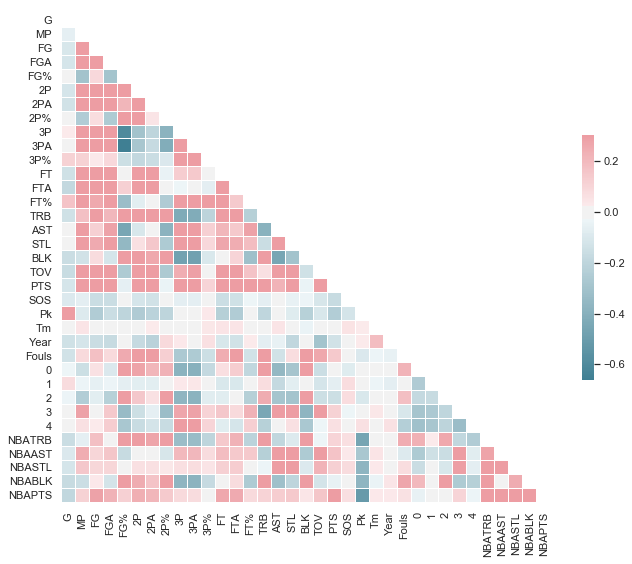

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Feature Selection

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 27)
reg = rfe.fit(train_x.values, train_y.NBAPTS.values)
print(reg.support_)
print(reg.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
 False  True False  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 3 1 4 1 1 1]


In [17]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
picks = []
for x in range(0,30):
    if reg.support_[x]:
        picks.append(cols[x])
train_x=train_x[picks]
test_x=test_x[picks]
train_x.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,BLK,TOV,PTS,SOS,Pk,Year,0,2,3,4
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,0.791051,-1.083978,-0.264125,-0.893807,1.872415,0.530167,0.142342,1.356737,-1.341998,-1.384652,...,2.505319,-0.724209,-0.661615,-0.067594,-1.547307,-1.747199,1.922575,-0.343753,-0.546974,-0.590708
Stromile Swift,-0.974416,-0.458212,0.280571,-0.356166,1.418773,0.917320,0.528005,1.263167,-1.080245,-1.081223,...,2.649874,0.557136,-0.015706,-0.306428,-1.485160,-1.747199,1.922575,-0.343753,-0.546974,-0.590708
Marcus Fizer,0.282811,0.901210,1.836844,1.400128,0.563833,2.465931,2.584872,0.121612,-1.080245,-1.081223,...,0.192436,0.272392,1.464502,-0.179639,-1.360865,-1.747199,1.922575,-0.343753,-0.546974,-0.590708
Mike Miller,-0.573174,-0.436634,-0.186311,-0.284481,0.075295,-0.321569,-0.586131,0.888887,0.228517,0.334776,...,-0.674895,0.130021,-0.042619,0.056246,-1.298718,-1.747199,-0.520136,-0.343753,-0.546974,-0.590708
DerMarr Johnson,-1.455907,-0.264009,-0.264125,-0.284481,-0.011944,-0.708722,-1.014645,1.076027,0.752023,0.789919,...,0.192436,-1.008952,-0.231009,0.477891,-1.236571,-1.747199,-0.520136,-0.343753,-0.546974,-0.590708


## Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([-0.01613283, -0.27266133, -0.67500784, -1.57742386,  0.05702277,
        0.50246245,  1.43396728,  0.11201712,  0.50348921,  1.02343404,
       -0.00878717, -0.10280053,  0.09069534,  0.0109388 ,  0.14261855,
        0.21790047,  0.06183815,  0.00622999, -0.04639809,  0.33346369,
        0.03570086, -0.41340396,  0.07907336, -0.067911  , -0.038655  ,
        0.06344555,  0.02801504])

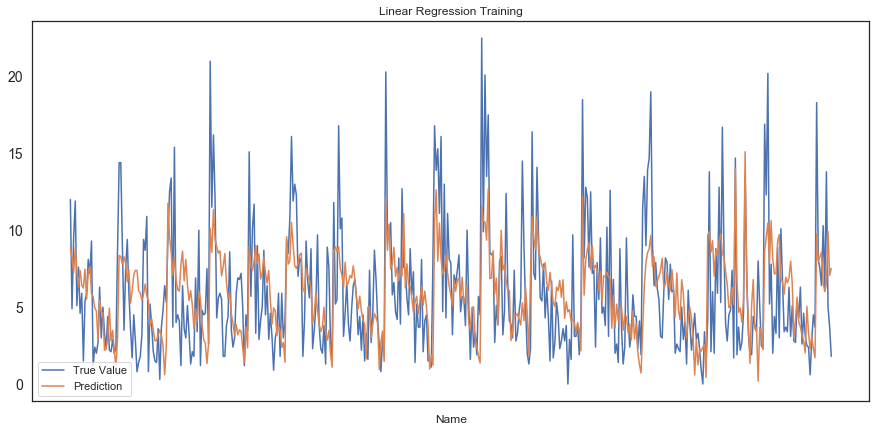

adj train r^2 = 0.33192596846586186
train mse = 10.492345135007126


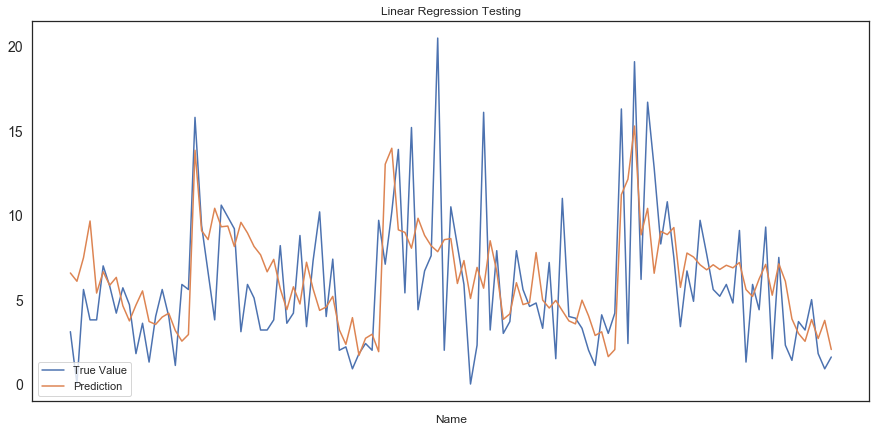

adj test r^2 = 0.19249476570134139
test mse = 12.466314650285831


In [19]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

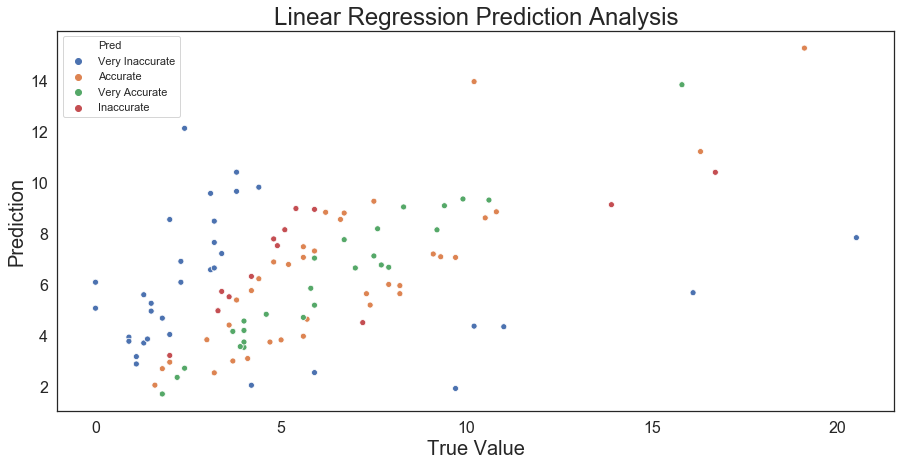

This model is able to relatively accurately predict 31.62% of NBA Rookies.
This model is able to very accurately predict 22.22% of NBA Rookies.


In [20]:
import seaborn as sns
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Linear Regression Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Extra Trees

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(min_samples_split=4, n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=4,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

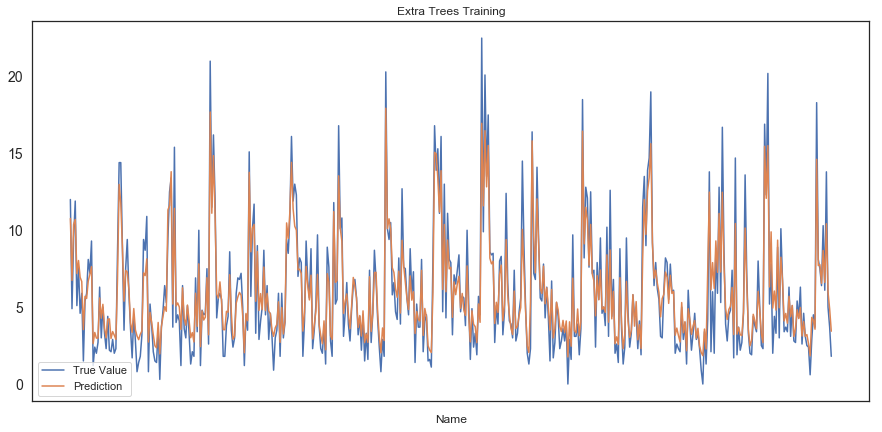

adj train r^2 = 0.8835920681264472
train mse = 1.8282288189902505


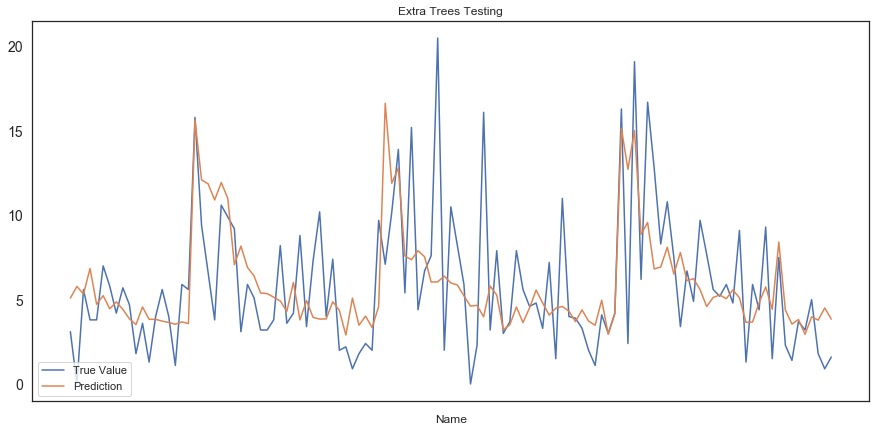

adj test r^2 = 0.2032994382408424
test mse = 12.29951146208395


In [22]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

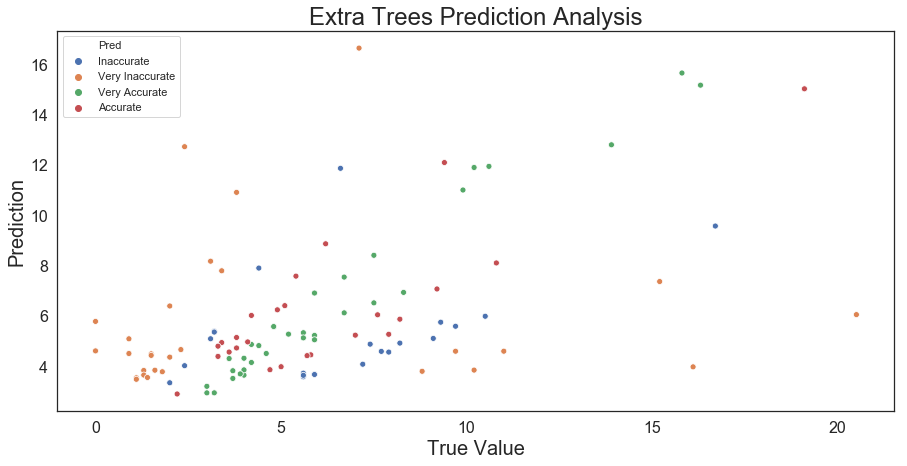

This model is able to relatively accurately predict 21.37% of NBA Rookies.
This model is able to very accurately predict 29.06% of NBA Rookies.


In [23]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Extra Trees Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Cross Validated Extra Trees

In [24]:
from sklearn.model_selection import cross_val_score
cross = np.split(df3, [30], axis=1)
cross_x=trains[0]
cross_y=trains[1]
cross_val_score(reg, cross_x, cross_y, cv=5, scoring='r2')

array([0.41749527, 0.45519827, 0.47512252, 0.36064524, 0.38523758])

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth': np.arange(7,18,2),
              'min_samples_split': np.arange(2,9),
              'bootstrap': [True, False],
              'n_estimators': [200,800]}

grid = RandomizedSearchCV(ExtraTreesRegressor(), param_grid, n_iter=10, cv=5)

In [26]:
grid.fit(cross_x, cross_y);

In [27]:
grid.best_params_

{'n_estimators': 800,
 'min_samples_split': 7,
 'max_depth': 15,
 'bootstrap': False}

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(min_samples_split=8, n_estimators=800, max_depth=13, bootstrap=False)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=13,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=8,
          min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

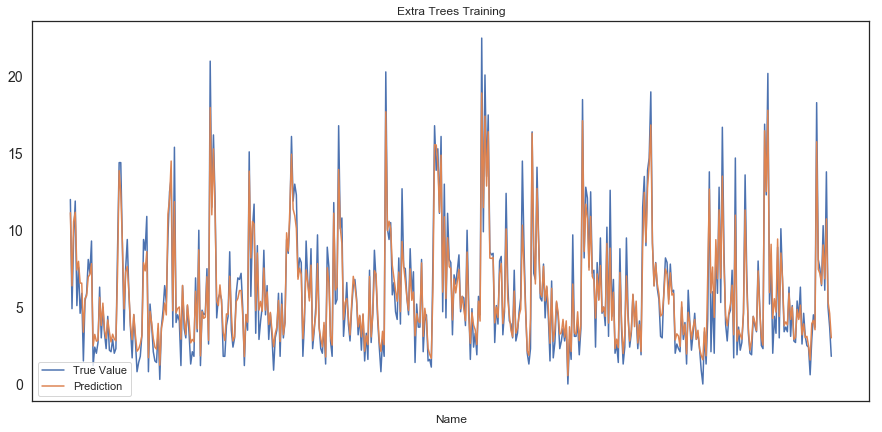

adj train r^2 = 0.9255368029745772
train mse = 1.169471534842691


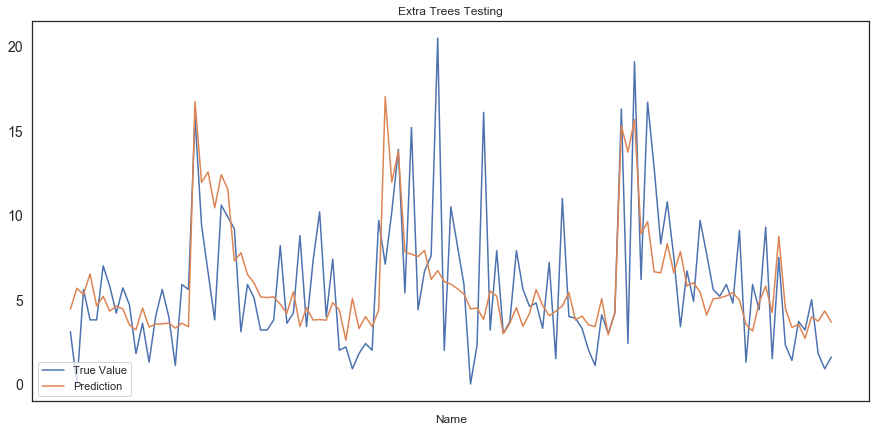

adj test r^2 = 0.20383088978824182
test mse = 12.291306880949543


In [29]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

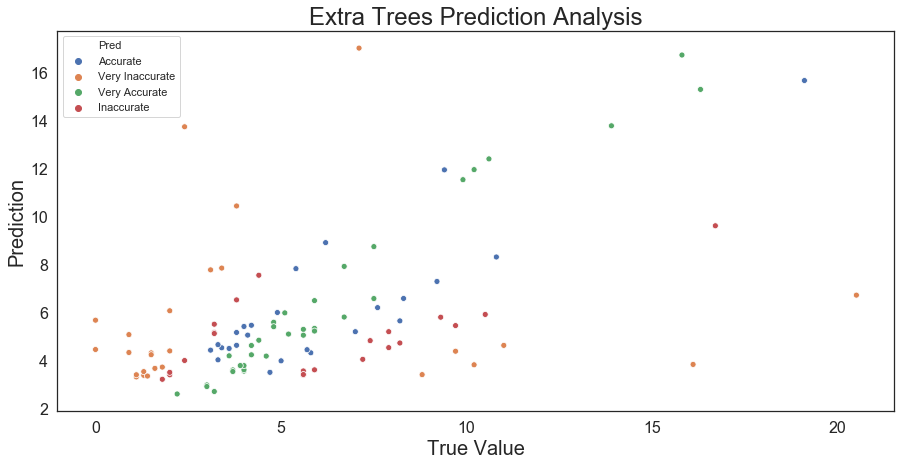

This model is able to relatively accurately predict 21.37% of NBA Rookies.
This model is able to very accurately predict 29.06% of NBA Rookies.


In [30]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Extra Trees Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Random Forrest

In [31]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

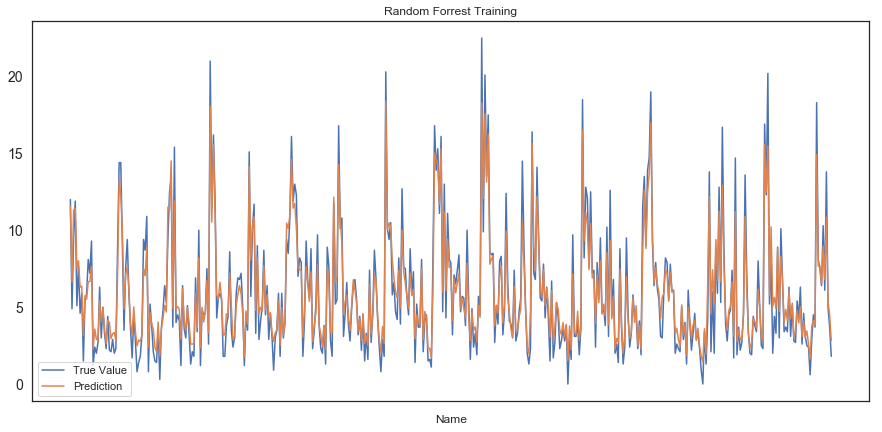

adj train r^2 = 0.9131354423086434
train mse = 1.3642394050319846


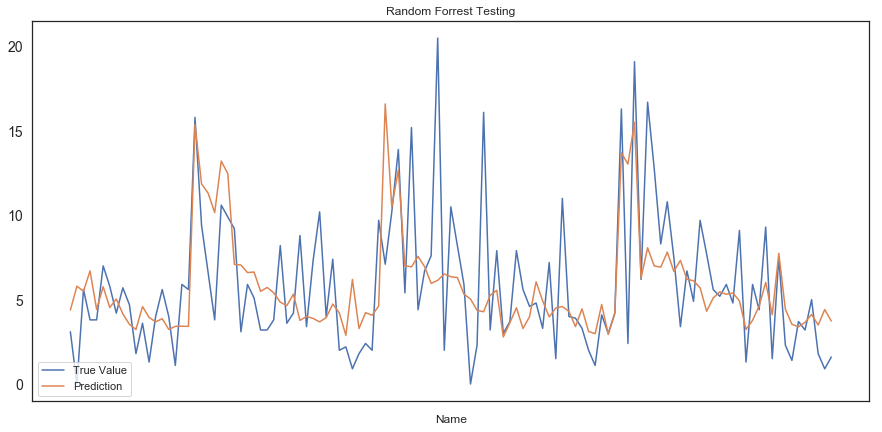

adj test r^2 = 0.20694102981395035
test mse = 12.2432923511111


In [32]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

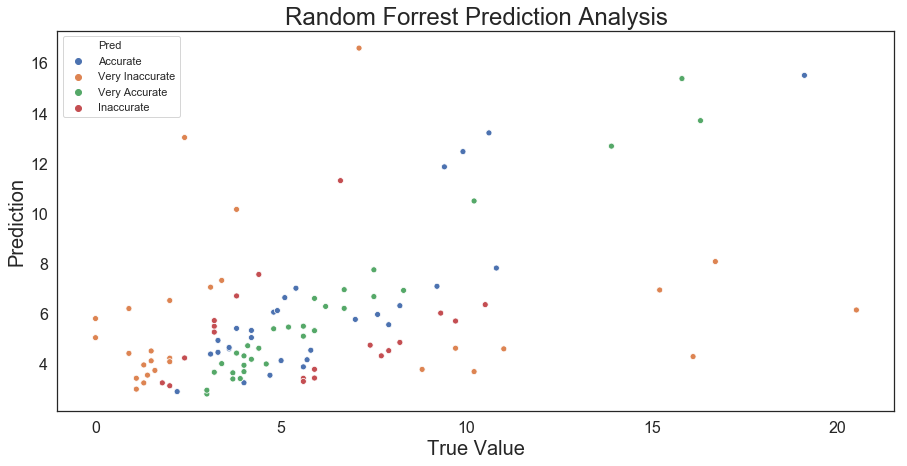

This model is able to relatively accurately predict 24.79% of NBA Rookies.
This model is able to very accurately predict 27.35% of NBA Rookies.


In [33]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Random Forrest Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## XGBoost

In [34]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [35]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000, max_depth=4, reg_lambda=.48, gamma=.3, booster='gblinear')
reg.fit(train_x.values, train_y.NBAPTS.values)

C:\Users\mmalig\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost-1.0.0_snapshot-py3.7.egg\xgboost\core.py:611: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.3,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=0.48, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

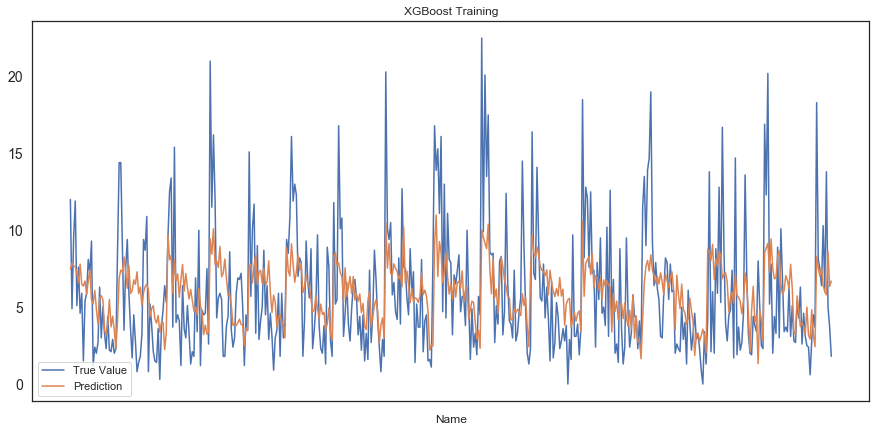

adj train r^2 = 0.27553647019567273
train mse = 11.37796267125839


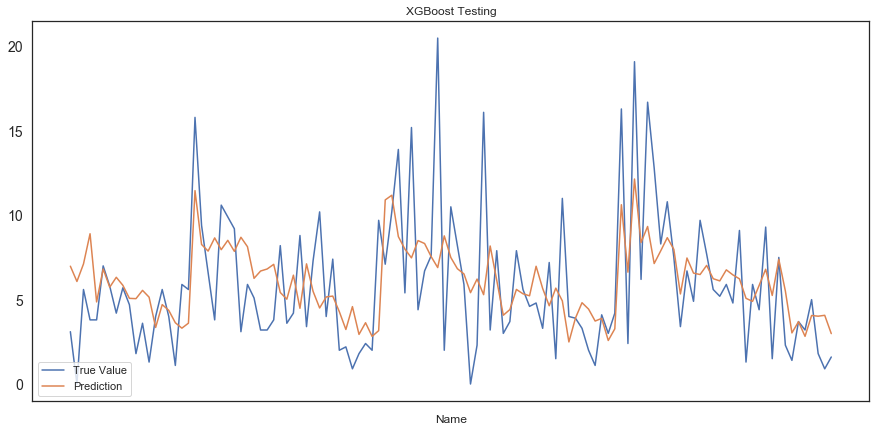

adj test r^2 = 0.2418194558047524
test mse = 11.704837100990417


In [36]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

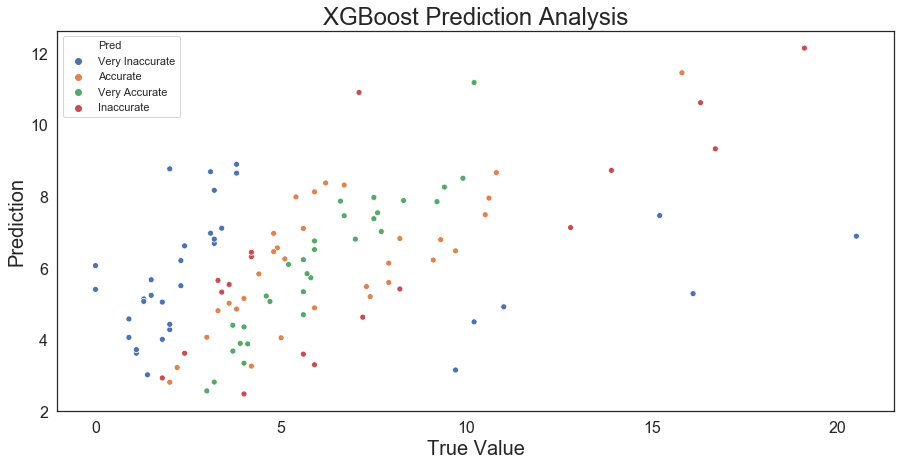

This model is able to relatively accurately predict 27.35% of NBA Rookies.
This model is able to very accurately predict 25.64% of NBA Rookies.


In [37]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("XGBoost Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Feed Forward Neural Network

In [38]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


In [40]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=27, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
#model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
out = model.fit(train_x.values, train_y.NBAPTS.values, validation_data=[test_x.values, test_y['NBAPTS'].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])

Instructions for updating:
Use tf.cast instead.


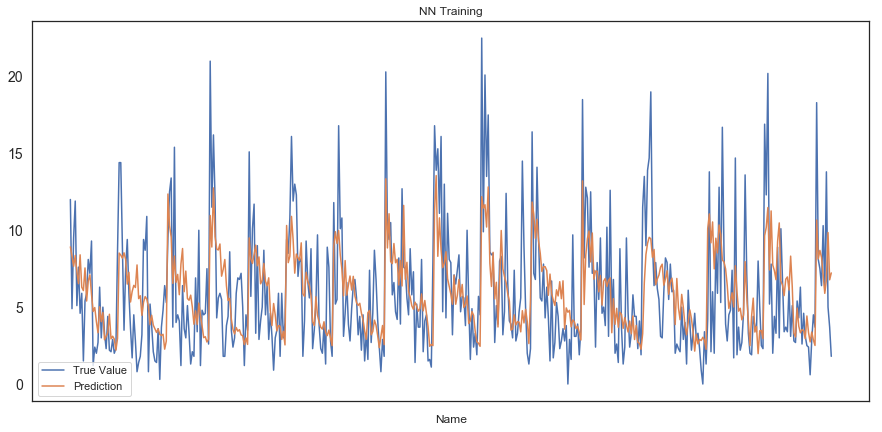

adj train r^2 = 0.3736865107622689
train mse = 9.836480661734937


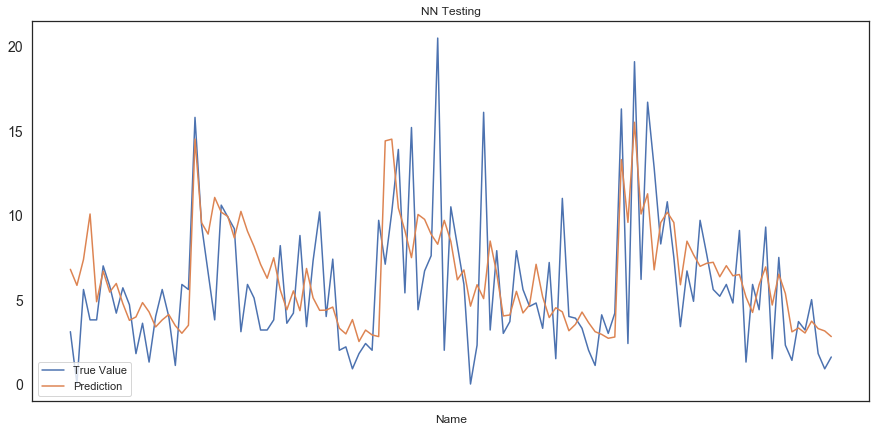

adj test r^2 = 0.22104127948223717
test mse = 12.025611843857027


In [41]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

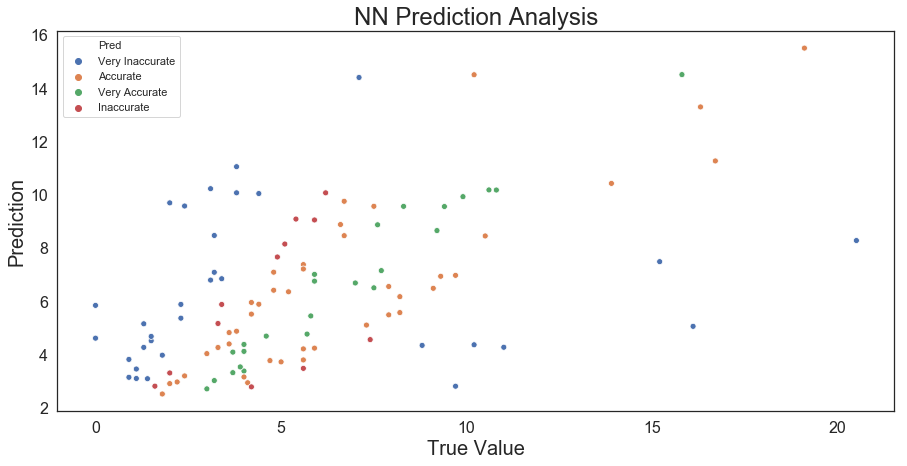

This model is able to relatively accurately predict 35.9% of NBA Rookies.
This model is able to very accurately predict 20.51% of NBA Rookies.


In [42]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("NN Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## LSTM

In [43]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [44]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='linear',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(600, activation='relu'))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.NBAPTS.values.ravel(), validation_data=[X_tst_t, test_y['NBAPTS'].values.ravel()], epochs=40, verbose=0, shuffle=False, callbacks=[early_stop])

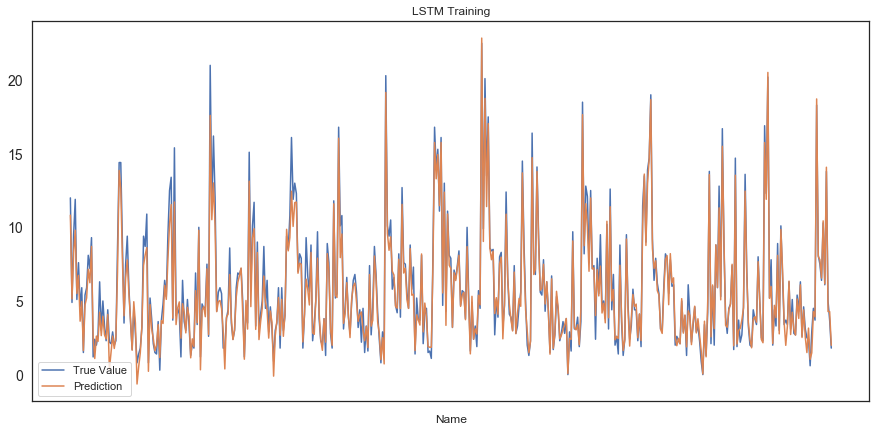

adj train r^2 = 0.9565611339301234
train mse = 0.6822231572627817


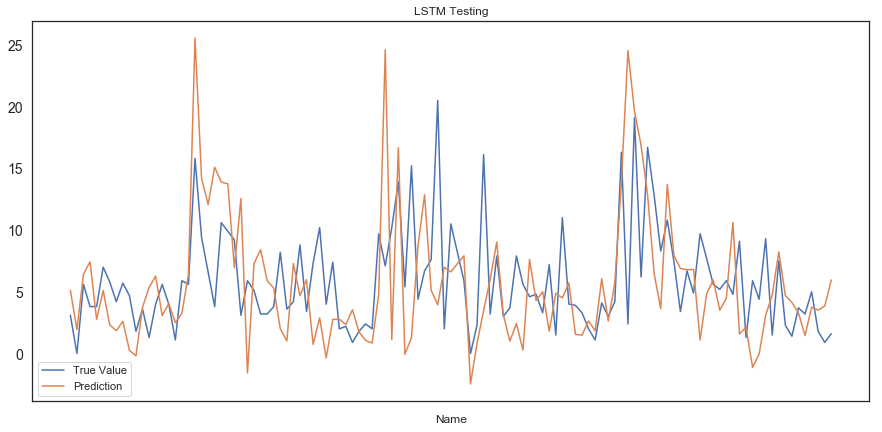

adj test r^2 = -0.8112214111660472
test mse = 27.96174570006521


In [45]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

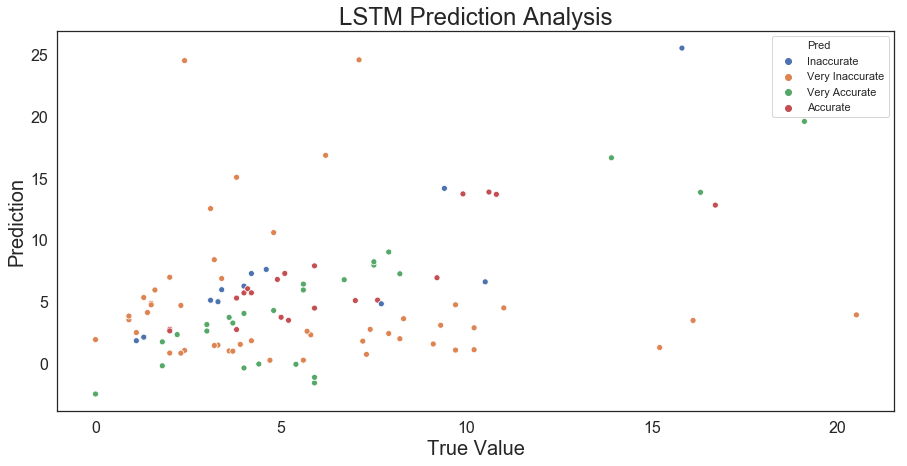

This model is able to relatively accurately predict 17.09% of NBA Rookies.
This model is able to very accurately predict 22.22% of NBA Rookies.


In [46]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("LSTM Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## TPOT

In [47]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=10, max_time_mins=2, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.NBAPTS.values.ravel())


2.011396733333333 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: ElasticNetCV(StandardScaler(DecisionTreeRegressor(SelectPercentile(SelectFwe(input_matrix, alpha=0.029), percentile=46), max_depth=2, min_samples_leaf=19, min_samples_split=6)), l1_ratio=0.9500000000000001, tol=0.1)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=2, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=10,
       random_state=None, scoring=None, subsample=1.0, template=None,
       use_dask=False, verbosity=1, warm_start=False)

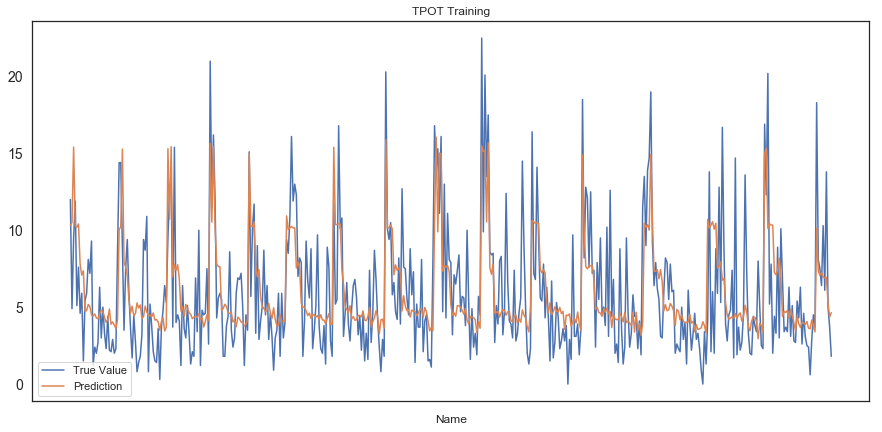

adj train r^2 = 0.433154729406805
train mse = 8.90251070461851


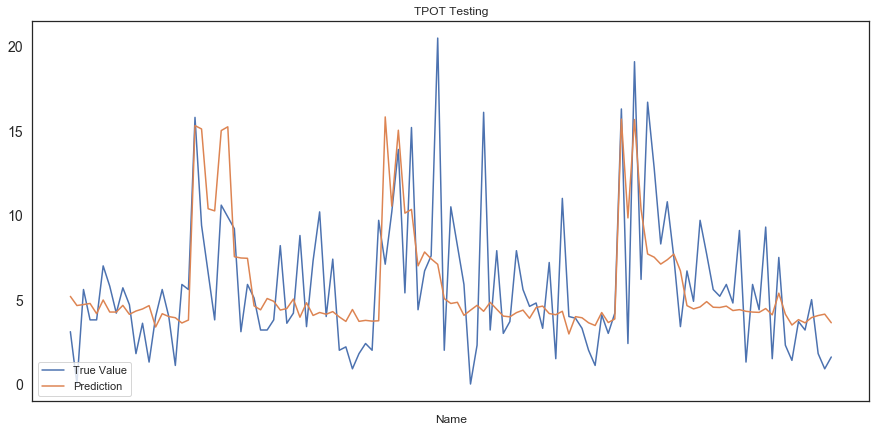

adj test r^2 = 0.22870320397546573
test mse = 11.9073265900874


In [48]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

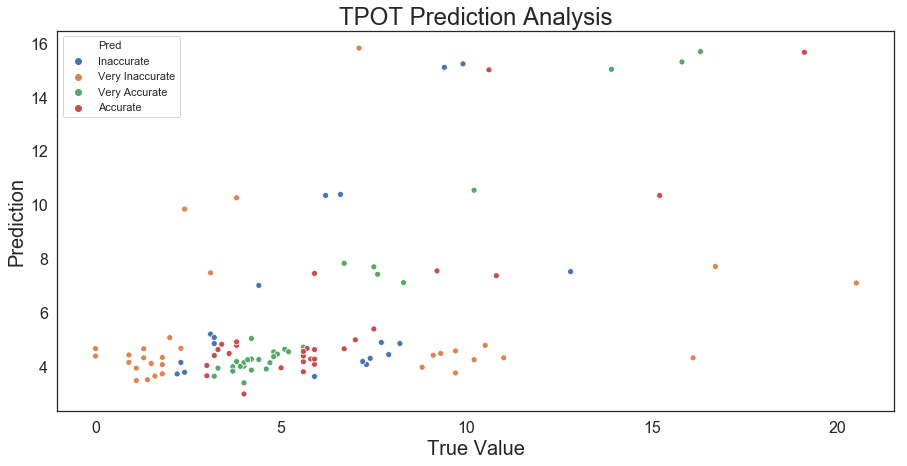

This model is able to relatively accurately predict 24.79% of NBA Rookies.
This model is able to very accurately predict 25.64% of NBA Rookies.


In [49]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("TPOT Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Very Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Differences

In [50]:
test_y2['chip'] = abs(test_y2['NBAPTS'] - test_y2['prediction'])
test_y2.sort_values('chip', ascending=True).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Darrun Hilliard,-0.653710,-0.381548,-0.743355,-0.841458,4.0,3.997383,Very Accurate,0.002617
Tyus Jones,-0.600697,1.171365,0.788456,-0.528930,4.2,4.264123,Very Accurate,0.064123
Sindarius Thornwell,-0.282622,-0.240374,0.533154,0.096124,3.9,3.991764,Very Accurate,0.091764
Hamidou Diallo,-0.282622,-0.663896,-0.232752,-0.216403,3.7,3.814614,Very Accurate,0.114614
Patrick McCaw,-0.547685,-0.099200,0.022550,-0.216403,4.0,4.134063,Very Accurate,0.134063


In [51]:
test_y2['chip'] = abs(test_y2['NBAPTS'] - test_y2['prediction'])
test_y2.sort_values('chip', ascending=False).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Donovan Mitchell,0.671603,1.736061,2.575569,0.096124,20.5,7.092253,Very Inaccurate,13.407747
Kyle Kuzma,2.049929,0.394909,0.277852,0.408652,16.1,4.309436,Very Inaccurate,11.790564
Collin Sexton,0.247503,1.241952,0.022550,-0.528930,16.7,7.705441,Very Inaccurate,8.994559
Markelle Fultz,0.353528,1.806648,1.043758,0.096124,7.1,15.827813,Very Inaccurate,8.727813
Jaren Jackson,-0.812747,-0.522722,0.022550,-0.841458,2.4,9.842337,Very Inaccurate,7.442337


## 2019 Predictions

In [52]:
train=df3
test=df4
trains = np.split(train, [30], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [30], axis=1)
test_x=tests[0]
test_y=tests[1]

In [53]:
test_y.head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Zion Williamson,-1.28986,-0.875657,-1.253959,-0.841458,-1.295658
RJ Barrett,-1.28986,-0.875657,-1.253959,-0.841458,-1.295658
DeAndre Hunter,-1.28986,-0.875657,-1.253959,-0.841458,-1.295658
Darius Garland,-1.28986,-0.875657,-1.253959,-0.841458,-1.295658
Coby White,-1.28986,-0.875657,-1.253959,-0.841458,-1.295658


In [54]:
from sklearn.feature_selection import RFE
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    model = LinearRegression()
    rfe = RFE(model, 23)
    reg = rfe.fit(train_x.values, train_y[col].values)
    cols = []
    co = df3.columns
    for colo in co:
        cols = cols + [colo]
    picks = []
    for x in range(0,30):
        if reg.support_[x]:
            picks.append(cols[x])
    train_x3 = train_x[picks]
    test_x3 = test_x[picks]
    K.clear_session()
    model = Sequential()
    model.add(Dense(128, input_dim=23, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
    model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.13)))
    model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error')
    early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
    out = model.fit(train_x3.values, train_y[col].values.ravel(), validation_data=[test_x3.values, test_y[col].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3.values))

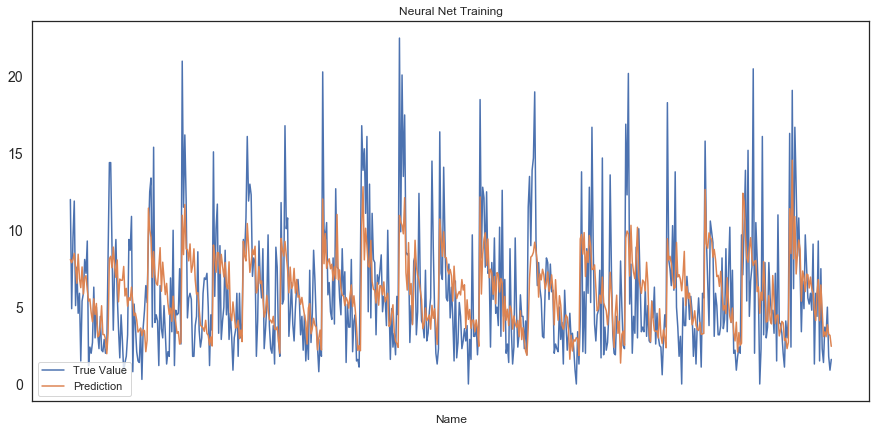

adj train r^2 = 0.3336317274428765
train mse = 10.501983456871237


In [55]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x3.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

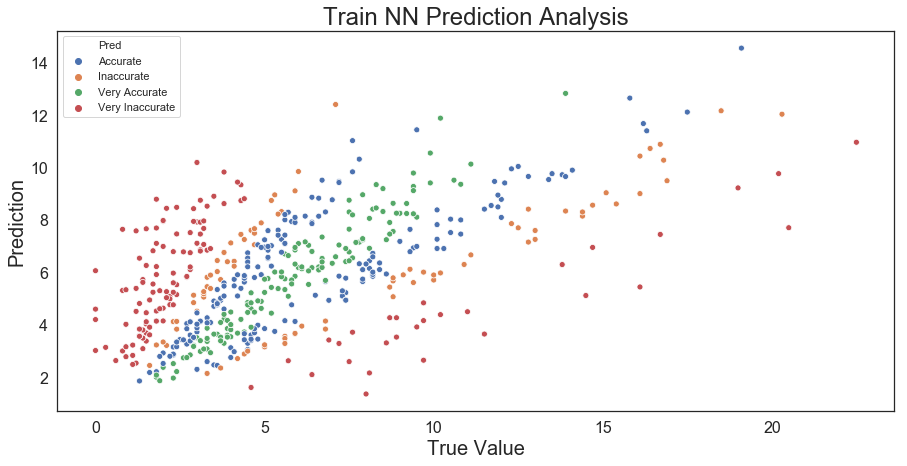

This model is able to relatively accurately predict 31.4% of NBA Rookies.
This model is able to very accurately predict 23.21% of NBA Rookies.


In [56]:
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) >= 2, 'Pred'] = 'Very Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.8, 'Pred'] = 'Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.2, 'Pred'] = 'Very Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=train_y2)
ax.set_title("Train NN Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")
print ("This model is able to very accurately predict " + str(round(100*len(train_y2[train_y2['Pred'] == 'Very Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")

## Results

In [57]:
test_y2 = test_y2.loc[~test_y2.index.duplicated(keep='first')]

In [58]:
test_y2['Value'] = 1*test_y2['NBAPTS'] + 1.2*test_y2['NBATRB'] + 1.5*test_y2['NBAAST'] + 3*test_y2['NBASTL'] + 3*test_y2['NBABLK']
test_y2.sort_values('Value', ascending=False)

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,
Zion Williamson,6.550270,2.654524,1.238266,0.706808,14.160180,31.837513
Ja Morant,4.020016,5.204893,0.923413,0.323680,11.560596,27.933233
RJ Barrett,3.764684,2.403891,0.650985,0.252410,12.213271,23.046915
Brandon Clarke,5.376814,1.391213,0.738478,0.934079,8.916957,22.473625
Coby White,2.679003,3.345378,0.766554,0.248663,10.847488,22.126011
Darius Garland,2.857768,2.985405,0.696781,0.259115,10.515545,21.290663
Jaxson Hayes,5.022509,1.124254,0.698709,0.877057,8.696245,21.136936
Bol Bol,4.795907,0.761360,0.427479,0.849956,9.515640,20.245075
Bruno Fernando,5.203292,1.087930,0.539159,0.754679,8.358010,20.115372


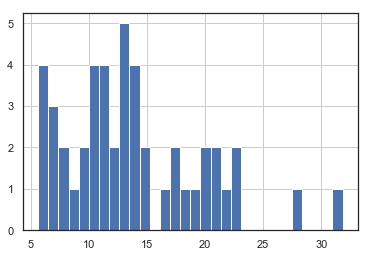

Value Distribution in Draft


In [59]:
hist = test_y2['Value'].hist(bins=30)
plt.show()
print('Value Distribution in Draft')
## This is the result of Neural Networks

In [60]:
test_y2['NBAPTS'].mean()

6.206226825714111

In [61]:
test_y2 = test_y2.round(2)
test_y2 = test_y2.sort_index(axis = 0) 
test_y2.head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,
Admiral Schofield,1.43,0.31,0.26,0.09,3.01,6.260000
Bol Bol,4.80,0.76,0.43,0.85,9.52,20.250000
Brandon Clarke,5.38,1.39,0.74,0.93,8.92,22.469999
Bruno Fernando,5.20,1.09,0.54,0.75,8.36,20.120001
Cam Reddish,1.93,1.10,0.67,0.31,7.28,14.180000


In [62]:
test_y2.to_csv('NewRookiePredictions.csv')

## Draft Night vs Results

In [63]:
college2 = pd.read_csv('../data/2019DraftResults.csv')
dfo = pd.read_csv('NewRookiePredictions2.csv')

FileNotFoundError: File b'../data/2019DraftResults.csv' does not exist

In [ ]:
college2 = college2.drop(['Unnamed: 0'], axis=1)
dfo = dfo.drop(['Unnamed: 0'], axis=1)
dfo = dfo.sort_values('Value', ascending=False)
dfo = dfo.reset_index()
dfo = dfo.drop(['index'], axis=1)
college2 = college2.rename(index=str, columns={"emp": "Name"})

In [ ]:
from IPython.display import display_html 
df1_styler = college2[college2['pos']=='PG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Point Guards:')
df2_styler = dfo[dfo['Pos']=='PG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Point Guards:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

In [ ]:
df1_styler = college2[college2['pos']=='SG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Shooting Guards:')
df2_styler = dfo[dfo['Pos']=='SG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Shooting Guards:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

In [ ]:
df1_styler = college2[college2['pos']=='SF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Small Forwards:')
df2_styler = dfo[dfo['Pos']=='SF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Small Forwards:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

In [ ]:
df1_styler = college2[college2['pos']=='PF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Power Forwards:')
df2_styler = dfo[dfo['Pos']=='PF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Power Forwards:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

In [ ]:
df1_styler = college2[college2['pos']=='C'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Centers:')
df2_styler = dfo[dfo['Pos']=='C'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Centers:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)